# Base Models

In this notebook, we train some base models without addressing the fact that class are highly imbalanced.

## Steps:
1. Data loading and preparation of train and test sets
2. Standardize the data using the training data.
3. Train the models on the training set and evaluate them on the test set
4. Comparison of model performance using metrics like balanced accuracy, recall, F1-score, precision, and ROC-AUC

In [ ]:
# Import essential libraries for data analysis, visualization, and modeling

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## Data Loading and Preparation

- Load the processed dataset for training.
- Separate the features and target variable.
- Split the data into training and testing sets.
- Standardize/scale the data as needed for certain models (e.g., Logistic Regression, SVM).

In [2]:
# Load the dataset

file_path = '../1_data/1.2_processed/data.csv'
data = pd.read_csv(file_path)

data.shape

(6819, 79)

In [3]:
# Separate features (X) and target variable (y)
X = data.drop(columns=['Bankrupt?'])  # Drop the target column
y = data['Bankrupt?']  # Target column

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
# Preprocessing the features

num_cols = X.select_dtypes(include=[float]).columns.to_list()

pipe_num = Pipeline([
    ('standardizer', StandardScaler())
])

prepoc = ColumnTransformer([
    ('num_transforms', pipe_num, num_cols)
], remainder='passthrough')
prepoc

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_transforms',
                                 Pipeline(steps=[('standardizer',
                                                  StandardScaler())]),
                                 ['ROA(C) before interest and depreciation '
                                  'before interest',
                                  'ROA(A) before interest and % after tax',
                                  'ROA(B) before interest and depreciation '
                                  'after tax',
                                  'Realized Sales Gross Margin',
                                  'Pre-tax net Interest Rate',
                                  'After-tax net Interest Rate',
                                  'Non-in...
                                  'Cash Flow Per Share',
                                  'Revenue Per Share (Yuan ¥)',
                                  'Operating Profit Per Share (Yuan ¥)',
                                  'Per Share Net profit before tax (Yuan ¥)',
                                  'Operating Profit Growth Rate',
                                  'After-tax Net Profit Growth Rate',
                                  'Regular Net Profit Growth Rate',
                                  'Continuous Net Profit Growth Rate',
                                  'Total Asset Growth Rate',
                                  'Net Value Growth Rate',
                                  'Total Asset Return Growth Rate Ratio',
                                  'Cash Reinvestment %', 'Quick Ratio', ...])])

In this section, we create a pipeline for each classification model to streamline preprocessing and model training. The following models will be evaluated:

 -  #### Logistic regression classifier
 - #### Support vector machine classifier
- #### Decision tree classifier
- #### Random forrest classifier
- #### K nearest neighbors classifier
- #### Multi-layer perceptron classifier

In [15]:
# Logistic regression classifier pipeline

pipe1 = Pipeline([
    ('preprocessing', prepoc),
    ('classifier', LogisticRegression(random_state=42))
])

pipe1

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   '(Yuan ¥)',
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('classifier', LogisticRegression(random_state=42))])

In [16]:
# Support vector machine classifier pipeline

pipe2 = Pipeline([
    ('preprocessing', prepoc),
    ('classifier', SVC(random_state=42))
])

pipe2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   'Operating Profit Per Share '
                                                   '(Yuan ¥)',
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('classifier', SVC(random_state=42))])

In [17]:
# Decision tree classifier pipeline

pipe3 = Pipeline([
    ('preprocessing', prepoc),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipe3

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   '(Yuan ¥)',
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [18]:
# Random forrest classifier pipeline

pipe4 = Pipeline([
    ('preprocessing', prepoc),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipe4

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   '(Yuan ¥)',
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [19]:
# K nearest neighbors classifier pipeline

pipe5 = Pipeline([
    ('preprocessing', prepoc),
    ('classifier', KNeighborsClassifier())
])

pipe5

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   'Operating Profit Per Share '
                                                   '(Yuan ¥)',
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('classifier', KNeighborsClassifier())])

In [20]:
# Multi-layer perceptron classifier pipeline

pipe6 = Pipeline([
    ('preprocessing', prepoc),
    ('classifier', MLPClassifier(random_state=42))
])

pipe6

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   'Operating Profit Per Share '
                                                   '(Yuan ¥)',
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('classifier', MLPClassifier(random_state=42))])

Now, we fit the models on the train set and evaluate them on the test set.

In [ ]:
# Train the models on the train set
pipe1.fit(X_train, y_train)
pipe2.fit(X_train, y_train)
pipe3.fit(X_train, y_train)
pipe4.fit(X_train, y_train)
pipe5.fit(X_train, y_train)
pipe6.fit(X_train, y_train)

test_scores = []

c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Evaluate the models on the test sets

y_pred_test = pipe1.predict(X_test)
y_proba_test = pipe1.predict_proba(X_test)
test_scores.append(['Logistic Regression', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), log_loss(y_test, y_proba_test),
                         roc_auc_score(y_test, y_proba_test[:,1])])


y_pred_test = pipe2.predict(X_test)
test_scores.append(['SVC', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), 'NA', 'NA'])


y_pred_test = pipe3.predict(X_test)
y_proba_test = pipe3.predict_proba(X_test)
test_scores.append(['Decision Tree', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), log_loss(y_test, y_proba_test),
                         roc_auc_score(y_test, y_proba_test[:,1])])


y_pred_test = pipe4.predict(X_test)
y_proba_test = pipe4.predict_proba(X_test)
test_scores.append(['Random Forrest', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), log_loss(y_test, y_proba_test),
                         roc_auc_score(y_test, y_proba_test[:,1])])

y_pred_test = pipe5.predict(X_test)
y_proba_test = pipe5.predict_proba(X_test)
test_scores.append(['KNN', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), log_loss(y_test, y_proba_test),
                         roc_auc_score(y_test, y_proba_test[:,1])])


y_pred_test = pipe6.predict(X_test)
y_proba_test = pipe6.predict_proba(X_test)
test_scores.append(['MLP', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), log_loss(y_test, y_proba_test),
                         roc_auc_score(y_test, y_proba_test[:,1])])

c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Comparing Base Models Performance on the Test Set

This section summarizes and compares the performance of all trained base models on the test set. The metrics evaluated include accuracy, balanced accuracy, recall, F1-score, precision, log loss, and ROC-AUC. The results are presented in a DataFrame, sorted by `balanced accuracy(test)` in descending order.


In [34]:
pd.DataFrame(test_scores,
             columns = ['pipleline', 'accuracy(test)', 'balanced accuracy(test)', 'recall(test)', 'f1(test)',
                        'precision(test)', 'log loss(test)', 'roc auc(test)']).sort_values('balanced accuracy(test)',ascending = False)

,pipleline,accuracy(test),balanced accuracy(test),recall(test),f1(test),precision(test),log loss(test),roc auc(test)
2,Decision Tree,0.958211,0.670833,0.363636,0.359551,0.355556,1.506223,0.670833
5,MLP,0.958944,0.638258,0.295455,0.317073,0.342105,0.295563,0.833454
3,Random Forrest,0.969941,0.578030,0.159091,0.254545,0.636364,0.130123,0.919706
4,KNN,0.969941,0.578030,0.159091,0.254545,0.636364,0.495923,0.775534
0,Logistic Regression,0.967009,0.576515,0.159091,0.237288,0.466667,0.157663,0.879769
1,SVC,0.967742,0.500000,0.000000,0.000000,0.000000,NA,NA


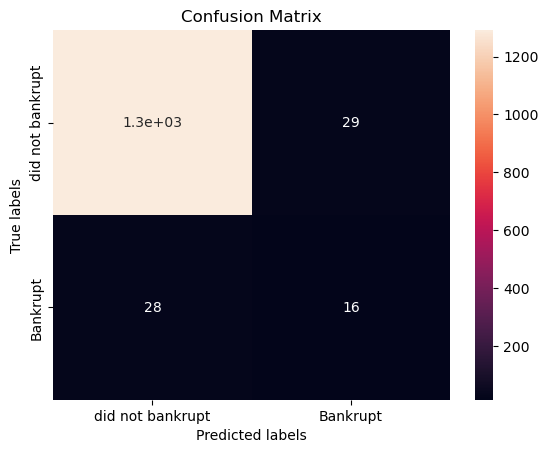

In [35]:
# Best model cofusion matrix
def plot_confusion_matrix(cm):
    "this function plots the confusion matrix"
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not bankrupt', 'Bankrupt']); ax.yaxis.set_ticklabels(['did not bankrupt', 'Bankrupt']) 
    plt.show()

y_pred_test = pipe3.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test))

### Base Model Performance Comparison: Explanation

From the table above, we observe that without any consideration about class imbalance, all the base models performs poorly. The best base model is the decision tree but it is still far from good.

### Key Takeaways:

We need to improve the performance of our models by considering the class imbalance in the prediction. We need to put more emphasis on the minority class which is 30 times less frequent. We address this issue with two different methods:
- Using class wights
- Using SMOTE method to oversample the minority class and make the classes balanced.
